Topic: Project 2  
Subject: Linear Regression  
Date: 01/27/2020  
Name: Ake Paramadilok  

In [1]:
from bs4 import BeautifulSoup
import requests
import time, os
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import seaborn as sns

chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

# Scrape PGAtour.com

## Define Categories to Scrape

In [2]:
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

stats ={
    'FEDEX REGULAR SEASON POINTS':'https://www.pgatour.com/content/pgatour/stats/stat.02394.html',
    'DRIVING ACCURACY PERCENTAGE':'https://www.pgatour.com/content/pgatour/stats/stat.102.html',
    'DRIVING DISTANCE':'https://www.pgatour.com/content/pgatour/stats/stat.101.html',
    'CLUB HEAD SPEED':'https://www.pgatour.com/content/pgatour/stats/stat.02401.html',
    'APPROACHES FROM 100_125 YARDS':'https://www.pgatour.com/content/pgatour/stats/stat.074.html',
    'APPROACHES FROM 125_150 YARDS':'https://www.pgatour.com/content/pgatour/stats/stat.339.html',
    'APPROACHES FROM 150_175 YARDS':'https://www.pgatour.com/content/pgatour/stats/stat.338.html',
    'APPROACHES FROM 175_200 YARDS':'https://www.pgatour.com/content/pgatour/stats/stat.337.html',
    'APPROACHES FROM 200_225 YARDS':'https://www.pgatour.com/content/pgatour/stats/stat.02358.html',
    'APPROACHES FROM 225_250 YARDS':'https://www.pgatour.com/content/pgatour/stats/stat.02359.html',
    'APPROACHES FROM 250_275 YARDS':'https://www.pgatour.com/content/pgatour/stats/stat.02360.html',
    'APPROACHES FROM INSIDE 100 YARDS':'https://www.pgatour.com/content/pgatour/stats/stat.02329.html',
    'FAIRWAY PROXIMITY':'https://www.pgatour.com/content/pgatour/stats/stat.431.html',
    'ROUGH PROXIMITY':'https://www.pgatour.com/content/pgatour/stats/stat.437.html',
    'APPROACHES FROM 100_125 YARDS RGH':'https://www.pgatour.com/content/pgatour/stats/stat.02364.html',
    'APPROACHES FROM 125_150 YARDS RGH':'https://www.pgatour.com/content/pgatour/stats/stat.02366.html',
    'APPROACHES FROM 150_175 YARDS RGH':'https://www.pgatour.com/content/pgatour/stats/stat.02367.html',
    'APPROACHES FROM 175_200 YARDS RGH':'https://www.pgatour.com/content/pgatour/stats/stat.02368.html',
    'APPROACHES FROM 200_225 YARDS RGH':'https://www.pgatour.com/content/pgatour/stats/stat.02372.html',
    'APPROACHES FROM 225_250 YARDS RGH':'https://www.pgatour.com/content/pgatour/stats/stat.02373.html',
    'APPROACHES FROM 250_275 YARDS RGH':'https://www.pgatour.com/content/pgatour/stats/stat.02374.html',
    'APPROACHES FROM INSIDE 100 YARDS RGH':'https://www.pgatour.com/content/pgatour/stats/stat.02370.html',
    'GREENS IN REGULATION PERCENTAGE':'https://www.pgatour.com/content/pgatour/stats/stat.103.html',
    'BIRDIE OR BETTER PERCENTAGE ROUGH':'https://www.pgatour.com/content/pgatour/stats/stat.02336.html',
    'BIRDIE OR BETTER PERCENTAGE FAIRWAY':'https://www.pgatour.com/content/pgatour/stats/stat.02333.html',
    'SAND SAVE PERCENTAGE':'https://www.pgatour.com/content/pgatour/stats/stat.111.html',
    'PUTTING INSIDE 10ft':'https://www.pgatour.com/content/pgatour/stats/stat.484.html',
    'PUTTING FROM 10 15ft':'https://www.pgatour.com/content/pgatour/stats/stat.405.html',
    'PUTTING FROM 15 20ft':'https://www.pgatour.com/content/pgatour/stats/stat.406.html',
    'PUTTING FROM 20 25ft':'https://www.pgatour.com/content/pgatour/stats/stat.407.html',
    'PUTTING FROM 25ft plus':'https://www.pgatour.com/content/pgatour/stats/stat.408.html',
    'BIRDIE OR BETTER CONVESION PERCENTAGE':'https://www.pgatour.com/content/pgatour/stats/stat.115.html',
    'PUTTS PER ROUND':'https://www.pgatour.com/content/pgatour/stats/stat.119.html',
    'PAR 3 SCORING AVERAGE':'https://www.pgatour.com/content/pgatour/stats/stat.142.html',
    'PAR 4 SCORING AVERAGE':'https://www.pgatour.com/content/pgatour/stats/stat.143.html',
    'PAR 5 SCORING AVERAGE':'https://www.pgatour.com/content/pgatour/stats/stat.144.html',
    'BIRDIE AVE':'https://www.pgatour.com/content/pgatour/stats/stat.156.html',
    'BIRDIE OR BETTER PERCENTAGE':'https://www.pgatour.com/content/pgatour/stats/stat.352.html',
    'BOUNCE BACK':'https://www.pgatour.com/content/pgatour/stats/stat.160.html',
    'EAGLES HOLES PER':'https://www.pgatour.com/content/pgatour/stats/stat.155.html',
    'FINAL ROUND PERFORMANCE':'https://www.pgatour.com/content/pgatour/stats/stat.219.html'
}

## Scraping Function

In [5]:
def df_builder(years,stats):
    z = defaultdict(list)
    missing_data = []
    
    for stat in list(stats.keys())[10:11]:
        
        #insert year into url to scrape stats from specific seasons
        stats[stat] = stats[stat].replace('.html','.y{}.html')
        x = defaultdict(list)
        
        for year in years[8:9]:    
            url = stats[stat].format(year)
            print(url)
            driver = webdriver.Chrome(chromedriver)
            driver.get(url)
            time.sleep(.5) 
            soup = BeautifulSoup(driver.page_source)
            
            # try to access website and create a list of players with stats, but if it does not work, skip to the next link
            try:
                player_list = soup.find('table',{'id':'statsTable'}).find_all('a')
            except AttributeError:
                missing_data.append(str(stat+' was not collected for '+year))
                continue   
            
            # find stats table on webpage from which data will be scraped
            data_list = soup.find('table',{'id':'statsTable'}).find_all('td',class_='')
            driver.quit()

            names = []
            stat_data = []
                
            # for each player in list, add them to the names list 
            for player in player_list:
                names.append(player.text)
                #print(names)
            
            # add data to list, store every other value
            for data in data_list[1::2]:
                stat_data.append(data.text.strip('\n').strip())
                #print(stat_data)
                
            name_stat_tuple = list(zip(names,stat_data))
                #print(name_stat_tuple)
                
            x[str(year)].append(name_stat_tuple)
        z[str(stat.replace(' ','_'))].append(x)
    display(missing_data)
    return z  

## Scrape Data

In [ ]:
dict_test = df_builder(years,stats)
print(dict_test)

## Pickle Scraped Data

In [ ]:
with open ('scraped_data_all','wb') as dbfile:
    pickle.dump(dict_test,dbfile)

### Confirm Save Worked

In [ ]:
with open ('scraped_data_all','rb') as dbfile:
    new_test_dict = pickle.load(dbfile)

In [ ]:
assert new_test_dict == dict_test

## Scrape Stats Missed
Some stats were missed the first time around so a another round of scraping was performed. 

Missing stats include:  

- Clubhead speed for 2019  
- Rough proximity for 2014  
- Rough proximity from 150 - 175 yards for 2014  
- Rough proximity from 150 - 175 yards for 2012   
- Rough proximity from 125 - 150 yards for 2019  
- Birdie average for 2010-2019  
- Approach proximity from 250 - 275 yards for 2018  
- Approach proximity from 150 - 175 yards for 2017  

This was done by manually augmenting the df_builder function.  All data was pickled and will be called in the following cells. 

## Load Pickles

In [20]:
pickle_to_open = [
    'scraped_data_all',
    'scraped_club_head_speed_2019',
    'rough_proximity_14_scraped',
    'rough_appr_150_175_14_scraped',
    'rough_appr_150_175_10_12_scraped',
    'rough_appr_125_150_19_scraped',
    'birdie_stats',
    'approach_250_275_18_scraped',
    'approach_150_175_17_scraped'
]

In [21]:
with open (pickle_to_open[0],'rb') as dbfile:
     scraped_data_all = pickle.load(dbfile)

In [22]:
with open (pickle_to_open[1],'rb') as dbfile:
     scraped_club_head_speed_2019 = pickle.load(dbfile)

In [23]:
with open (pickle_to_open[2],'rb') as dbfile:
     rough_proximity_14_scraped = pickle.load(dbfile)

In [24]:
with open (pickle_to_open[3],'rb') as dbfile:
     rough_appr_150_175_14_scraped = pickle.load(dbfile)

In [25]:
with open (pickle_to_open[4],'rb') as dbfile:
     rough_appr_150_175_10_12_scraped = pickle.load(dbfile)

In [26]:
with open (pickle_to_open[5],'rb') as dbfile:
     rough_appr_125_150_19_scraped = pickle.load(dbfile)

In [27]:
with open (pickle_to_open[6],'rb') as dbfile:
     birdie_stats = pickle.load(dbfile)

In [28]:
with open (pickle_to_open[7],'rb') as dbfile:
     approach_250_275_18_scraped= pickle.load(dbfile)

In [29]:
with open (pickle_to_open[8],'rb') as dbfile:
     approach_150_175_17_scraped= pickle.load(dbfile)

## Create Original DataFrame

The cell below takes the loaded pickles, which are triple nested defaultdict objects and unpacks them into a list of dictionaries called 'overall_data_store'. 

In [30]:
counter = 0

overall_data_store = []

dicts = [
    scraped_data_all,
    scraped_club_head_speed_2019,
    rough_proximity_14_scraped,
    rough_appr_150_175_14_scraped,
    rough_appr_150_175_10_12_scraped,
    rough_appr_125_150_19_scraped,
    birdie_stats,
    approach_250_275_18_scraped,
    approach_150_175_17_scraped
]

for dict_ in dicts:
    for cat_key in dict_.keys():
        for year in dict_[cat_key][0].keys():
            if len(dict_[cat_key][0][year]) > 0:
                for player_tup in dict_[cat_key][0][year][0]:
                    row = {}
                    row['year'] = year
                    row['player'] = player_tup[0]
                    row['metric'] = cat_key
                    row['value'] = player_tup[1]
                    overall_data_store.append(row)   

In [31]:
# Checking length of data
len(overall_data_store)

77170

### Prep for Pivot: Adding Player Year Column

In [32]:
# Create initial df and add column combining player and year
player_df = pd.DataFrame(overall_data_store)
player_df['py'] = player_df['year'] + '_' + player_df['player']
player_df

,year,player,metric,value,py
0,2010,Ernie Els,FEDEX_REGULAR_SEASON_POINTS,"1,846",2010_Ernie Els
1,2010,Steve Stricker,FEDEX_REGULAR_SEASON_POINTS,"1,697",2010_Steve Stricker
2,2010,Jim Furyk,FEDEX_REGULAR_SEASON_POINTS,"1,691",2010_Jim Furyk
3,2010,Phil Mickelson,FEDEX_REGULAR_SEASON_POINTS,"1,629",2010_Phil Mickelson
4,2010,Justin Rose,FEDEX_REGULAR_SEASON_POINTS,"1,593",2010_Justin Rose
...,...,...,...,...,...
77165,2017,Mackenzie Hughes,APPROACHES_FROM_150_175_YARDS,"31' 9""",2017_Mackenzie Hughes
77166,2017,Andrew Loupe,APPROACHES_FROM_150_175_YARDS,"32' 1""",2017_Andrew Loupe
77167,2017,Kevin Tway,APPROACHES_FROM_150_175_YARDS,"32' 2""",2017_Kevin Tway
77168,2017,Si Woo Kim,APPROACHES_FROM_150_175_YARDS,"32' 3""",2017_Si Woo Kim


In [33]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77170 entries, 0 to 77169
Data columns (total 5 columns):
year      77170 non-null object
player    77170 non-null object
metric    77170 non-null object
value     77170 non-null object
py        77170 non-null object
dtypes: object(5)
memory usage: 2.9+ MB


### Pivot

In [34]:
all_data = player_df.pivot(index='py',columns='metric',values='value').reset_index().copy()

# Data Cleaning

In [35]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 42 columns):
py                                       2570 non-null object
APPROACHES_FROM_100_125_YARDS            1866 non-null object
APPROACHES_FROM_100_125_YARDS_RGH        1866 non-null object
APPROACHES_FROM_125_150_YARDS            1866 non-null object
APPROACHES_FROM_125_150_YARDS_RGH        1866 non-null object
APPROACHES_FROM_150_175_YARDS            1866 non-null object
APPROACHES_FROM_150_175_YARDS_RGH        1866 non-null object
APPROACHES_FROM_175_200_YARDS            1866 non-null object
APPROACHES_FROM_175_200_YARDS_RGH        1866 non-null object
APPROACHES_FROM_200_225_YARDS            1866 non-null object
APPROACHES_FROM_200_225_YARDS_RGH        1866 non-null object
APPROACHES_FROM_225_250_YARDS            1866 non-null object
APPROACHES_FROM_225_250_YARDS_RGH        1865 non-null object
APPROACHES_FROM_250_275_YARDS            1866 non-null object
APPROACHES_FROM_250_275_Y

## Check for Nulls

In [36]:
all_data.isnull().any()

metric
py                                       False
APPROACHES_FROM_100_125_YARDS             True
APPROACHES_FROM_100_125_YARDS_RGH         True
APPROACHES_FROM_125_150_YARDS             True
APPROACHES_FROM_125_150_YARDS_RGH         True
APPROACHES_FROM_150_175_YARDS             True
APPROACHES_FROM_150_175_YARDS_RGH         True
APPROACHES_FROM_175_200_YARDS             True
APPROACHES_FROM_175_200_YARDS_RGH         True
APPROACHES_FROM_200_225_YARDS             True
APPROACHES_FROM_200_225_YARDS_RGH         True
APPROACHES_FROM_225_250_YARDS             True
APPROACHES_FROM_225_250_YARDS_RGH         True
APPROACHES_FROM_250_275_YARDS             True
APPROACHES_FROM_250_275_YARDS_RGH         True
APPROACHES_FROM_INSIDE_100_YARDS          True
APPROACHES_FROM_INSIDE_100_YARDS_RGH      True
BIRDIE_AVE                                True
BIRDIE_OR_BETTER_CONVESION_PERCENTAGE     True
BIRDIE_OR_BETTER_PERCENTAGE               True
BIRDIE_OR_BETTER_PERCENTAGE_FAIRWAY       True
BIRDIE

## Drop Rows with Nulls in All Stats Except FedEx Cup Points

In [37]:
all_data[all_data['BIRDIE_AVE'].isnull()]
all_data2 = all_data.dropna(axis = 0, how="any")

## Check Data Types

In [38]:
all_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 2568
Data columns (total 42 columns):
py                                       1827 non-null object
APPROACHES_FROM_100_125_YARDS            1827 non-null object
APPROACHES_FROM_100_125_YARDS_RGH        1827 non-null object
APPROACHES_FROM_125_150_YARDS            1827 non-null object
APPROACHES_FROM_125_150_YARDS_RGH        1827 non-null object
APPROACHES_FROM_150_175_YARDS            1827 non-null object
APPROACHES_FROM_150_175_YARDS_RGH        1827 non-null object
APPROACHES_FROM_175_200_YARDS            1827 non-null object
APPROACHES_FROM_175_200_YARDS_RGH        1827 non-null object
APPROACHES_FROM_200_225_YARDS            1827 non-null object
APPROACHES_FROM_200_225_YARDS_RGH        1827 non-null object
APPROACHES_FROM_225_250_YARDS            1827 non-null object
APPROACHES_FROM_225_250_YARDS_RGH        1827 non-null object
APPROACHES_FROM_250_275_YARDS            1827 non-null object
APPROACHES_FROM_250_275_Y

In [39]:
# All proximity data needs to be converted to feet. 
all_data2.APPROACHES_FROM_100_125_YARDS_RGH

0        38' 8"
1        25' 0"
2        28' 2"
3        34' 2"
4        32' 1"
         ...   
2562     28' 9"
2563    29' 10"
2565    30' 11"
2566     32' 5"
2568     32' 1"
Name: APPROACHES_FROM_100_125_YARDS_RGH, Length: 1827, dtype: object

### Convert Proximity to Inches

#### Function: Convert Proximity to Inches

In [40]:
def parse_to_inch(distance):
    dist = distance.split('\'')
    feet = dist[0]
    inch = dist[1].strip().replace('"','')
    dist_inch = int(feet)*12 + int(inch)
    return dist_inch

#### Convert All Proximity Columns to Inches

In [41]:
proximity_categories = [
    'APPROACHES_FROM_100_125_YARDS',
    'APPROACHES_FROM_100_125_YARDS_RGH',
    'APPROACHES_FROM_125_150_YARDS',
    'APPROACHES_FROM_125_150_YARDS_RGH',
    'APPROACHES_FROM_150_175_YARDS',
    'APPROACHES_FROM_150_175_YARDS_RGH',
    'APPROACHES_FROM_175_200_YARDS',
    'APPROACHES_FROM_175_200_YARDS_RGH',
    'APPROACHES_FROM_200_225_YARDS',
    'APPROACHES_FROM_200_225_YARDS_RGH',
    'APPROACHES_FROM_225_250_YARDS',
    'APPROACHES_FROM_225_250_YARDS_RGH',
    'APPROACHES_FROM_250_275_YARDS',
    'APPROACHES_FROM_250_275_YARDS_RGH',
    'APPROACHES_FROM_INSIDE_100_YARDS',
    'APPROACHES_FROM_INSIDE_100_YARDS_RGH',
    'FAIRWAY_PROXIMITY',
    'ROUGH_PROXIMITY',
    ]

def series_to_inches(column_name,df):
    for name in column_name:
        df[name] = df[name].apply(lambda x: parse_to_inch(x))
    return df.info()

series_to_inches(proximity_categories,all_data2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 2568
Data columns (total 42 columns):
py                                       1827 non-null object
APPROACHES_FROM_100_125_YARDS            1827 non-null int64
APPROACHES_FROM_100_125_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_125_150_YARDS            1827 non-null int64
APPROACHES_FROM_125_150_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_150_175_YARDS            1827 non-null int64
APPROACHES_FROM_150_175_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_175_200_YARDS            1827 non-null int64
APPROACHES_FROM_175_200_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_200_225_YARDS            1827 non-null int64
APPROACHES_FROM_200_225_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_225_250_YARDS            1827 non-null int64
APPROACHES_FROM_225_250_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_250_275_YARDS            1827 non-null int64
APPROACHES_FROM_250_275_YARDS_RGH     

/Users/AKE/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Convert Number Strings to Float

#### Function: to Float

In [42]:
def to_float(column_name,df):
    for name in column_name:
        df[name] = df[name].apply(lambda x: float(str(x).replace(',','').strip()))
    return df.info()

#### Conversion of Strings to Float

In [43]:
column_to_float = [
    'BIRDIE_AVE',                               
    'BIRDIE_OR_BETTER_CONVESION_PERCENTAGE',    
    'BIRDIE_OR_BETTER_PERCENTAGE',              
    'BIRDIE_OR_BETTER_PERCENTAGE_FAIRWAY',      
    'BIRDIE_OR_BETTER_PERCENTAGE_ROUGH',       
    'BOUNCE_BACK',                             
    'CLUB_HEAD_SPEED',                         
    'DRIVING_ACCURACY_PERCENTAGE',              
    'DRIVING_DISTANCE',                        
    'EAGLES_HOLES_PER',
    'FINAL_ROUND_PERFORMANCE',
    'GREENS_IN_REGULATION_PERCENTAGE',
    'PAR_3_SCORING_AVERAGE',
    'PAR_4_SCORING_AVERAGE',
    'PAR_5_SCORING_AVERAGE',
    'PUTTING_FROM_10_15ft',
    'PUTTING_FROM_15_20ft',
    'PUTTING_FROM_20_25ft',
    'PUTTING_FROM_25ft_plus',
    'PUTTING_INSIDE_10ft',
    'PUTTS_PER_ROUND',
    'SAND_SAVE_PERCENTAGE',
    ]

to_float(column_to_float,all_data2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 2568
Data columns (total 42 columns):
py                                       1827 non-null object
APPROACHES_FROM_100_125_YARDS            1827 non-null int64
APPROACHES_FROM_100_125_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_125_150_YARDS            1827 non-null int64
APPROACHES_FROM_125_150_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_150_175_YARDS            1827 non-null int64
APPROACHES_FROM_150_175_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_175_200_YARDS            1827 non-null int64
APPROACHES_FROM_175_200_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_200_225_YARDS            1827 non-null int64
APPROACHES_FROM_200_225_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_225_250_YARDS            1827 non-null int64
APPROACHES_FROM_225_250_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_250_275_YARDS            1827 non-null int64
APPROACHES_FROM_250_275_YARDS_RGH     

/Users/AKE/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Convert FedEx Cup Points from String to Float

In [44]:
all_data2.FEDEX_REGULAR_SEASON_POINTS = all_data2.FEDEX_REGULAR_SEASON_POINTS.apply(lambda x: int(str(x).replace(',','').strip()))

/Users/AKE/opt/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Create Player and Season Columns

In [45]:
all_data2['PLAYER'] = all_data2.py.apply(lambda x: str(x).split('_')[1])
all_data2['SEASON'] = all_data2.py.apply(lambda x: str(x).split('_')[0])

/Users/AKE/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/AKE/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Save Clean Data

In [46]:
# Check all column names for formatting
all_data2.columns

Index(['py', 'APPROACHES_FROM_100_125_YARDS',
       'APPROACHES_FROM_100_125_YARDS_RGH', 'APPROACHES_FROM_125_150_YARDS',
       'APPROACHES_FROM_125_150_YARDS_RGH', 'APPROACHES_FROM_150_175_YARDS',
       'APPROACHES_FROM_150_175_YARDS_RGH', 'APPROACHES_FROM_175_200_YARDS',
       'APPROACHES_FROM_175_200_YARDS_RGH', 'APPROACHES_FROM_200_225_YARDS',
       'APPROACHES_FROM_200_225_YARDS_RGH', 'APPROACHES_FROM_225_250_YARDS',
       'APPROACHES_FROM_225_250_YARDS_RGH', 'APPROACHES_FROM_250_275_YARDS',
       'APPROACHES_FROM_250_275_YARDS_RGH', 'APPROACHES_FROM_INSIDE_100_YARDS',
       'APPROACHES_FROM_INSIDE_100_YARDS_RGH', 'BIRDIE_AVE',
       'BIRDIE_OR_BETTER_CONVESION_PERCENTAGE', 'BIRDIE_OR_BETTER_PERCENTAGE',
       'BIRDIE_OR_BETTER_PERCENTAGE_FAIRWAY',
       'BIRDIE_OR_BETTER_PERCENTAGE_ROUGH', 'BOUNCE_BACK', 'CLUB_HEAD_SPEED',
       'DRIVING_ACCURACY_PERCENTAGE', 'DRIVING_DISTANCE', 'EAGLES_HOLES_PER',
       'FAIRWAY_PROXIMITY', 'FEDEX_REGULAR_SEASON_POINTS',
       'FIN

In [48]:
# Converting saved data from pickle to csv to conform with better practice. I will be using csv moving forward in future projects. 
all_data2.to_csv('full_dataset_clean.csv', index = False)

## Further DataFrame Refinement

In [72]:
clean_data = pd.read_csv('full_dataset_clean.csv')
clean_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 44 columns):
py                                       1827 non-null object
APPROACHES_FROM_100_125_YARDS            1827 non-null int64
APPROACHES_FROM_100_125_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_125_150_YARDS            1827 non-null int64
APPROACHES_FROM_125_150_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_150_175_YARDS            1827 non-null int64
APPROACHES_FROM_150_175_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_175_200_YARDS            1827 non-null int64
APPROACHES_FROM_175_200_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_200_225_YARDS            1827 non-null int64
APPROACHES_FROM_200_225_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_225_250_YARDS            1827 non-null int64
APPROACHES_FROM_225_250_YARDS_RGH        1827 non-null int64
APPROACHES_FROM_250_275_YARDS            1827 non-null int64
APPROACHES_FROM_250_275_YARDS_RGH     

### Create Column of Percentage of Winning Points
Since FedEx Points varied in mean and winning total each season due to rule changes from season to season, all players points will be converted to the percentage of that season's winning total, with winners receiving a value of 1.  

In [73]:
# Dictionary of winning point totals for each season

mask_19 = clean_data['SEASON'] == 2019
mask_18 = clean_data['SEASON'] == 2018
mask_17 = clean_data['SEASON'] == 2017
mask_16 = clean_data['SEASON'] == 2016
mask_15 = clean_data['SEASON'] == 2015
mask_14 = clean_data['SEASON'] == 2014
mask_13 = clean_data['SEASON'] == 2013
mask_12 = clean_data['SEASON'] == 2012
mask_11 = clean_data['SEASON'] == 2011
mask_10 = clean_data['SEASON'] == 2010

mask_list = [mask_19, mask_18, mask_17, mask_16, mask_15, mask_14, mask_13, mask_12, mask_11, mask_10]

winning_pts = {'2019':clean_data[mask_19].FEDEX_REGULAR_SEASON_POINTS.max(),
               '2018':clean_data[mask_18].FEDEX_REGULAR_SEASON_POINTS.max(),
               '2017':clean_data[mask_17].FEDEX_REGULAR_SEASON_POINTS.max(),
               '2016':clean_data[mask_16].FEDEX_REGULAR_SEASON_POINTS.max(),
               '2015':clean_data[mask_15].FEDEX_REGULAR_SEASON_POINTS.max(),
               '2014':clean_data[mask_14].FEDEX_REGULAR_SEASON_POINTS.max(),
               '2013':clean_data[mask_13].FEDEX_REGULAR_SEASON_POINTS.max(),
               '2012':clean_data[mask_12].FEDEX_REGULAR_SEASON_POINTS.max(),
               '2011':clean_data[mask_11].FEDEX_REGULAR_SEASON_POINTS.max(),
               '2010':clean_data[mask_10].FEDEX_REGULAR_SEASON_POINTS.max(),
              }

In [76]:
# Creating and adding percentage of winning column
PERCENTAGE_OF_WINNING_PTS = []

for i in range(0,clean_data.shape[0]):
    PERCENTAGE_OF_WINNING_PTS.append(clean_data.FEDEX_REGULAR_SEASON_POINTS.iloc[i]/(winning_pts[str(clean_data.SEASON.iloc[i])]))
    
clean_data['PERCENTAGE_OF_WINNING_PTS'] = PERCENTAGE_OF_WINNING_PTS

### Creating Column for Next Season Results

#### Evaluation of FedEx Point Max and Mean by Season

In [77]:
# Examine mean and max for each season
def fedex_by_year(df,mask_list,init_season,end_season):
    
    season_stats = dict.fromkeys(['SEASON','MIN','MEAN','MAX'])
    season_stats['SEASON'] = [i for i in range(init_season,end_season+1)]
    
    mins = []
    means = []
    maxs = []
    
    for mask in mask_list:
        new_min = df[mask].FEDEX_REGULAR_SEASON_POINTS.min()
        mins.append(new_min)
        
        new_mean = df[mask].FEDEX_REGULAR_SEASON_POINTS.mean()
        means.append(new_mean)
        
        new_max = df[mask].FEDEX_REGULAR_SEASON_POINTS.max()
        maxs.append(new_max)
    
    season_stats['MIN'] = mins
    season_stats['MEAN'] = means
    season_stats['MAX'] = maxs
    
    stats_df = pd.DataFrame.from_dict(season_stats)
    
    return stats_df

stats_df_new = fedex_by_year(clean_data,mask_list,2010,2019)   

In [78]:
stats_df_new

,SEASON,MIN,MEAN,MAX
0,2010,34,595.271739,2887
1,2011,16,635.624339,2717
2,2012,9,601.631016,2869
3,2013,9,685.219780,2735
4,2014,63,705.200000,4169
5,2015,94,719.783626,2582
6,2016,72,627.942529,3059
7,2017,3,585.967742,2269
8,2018,84,592.005464,1906
9,2019,6,553.706806,1846


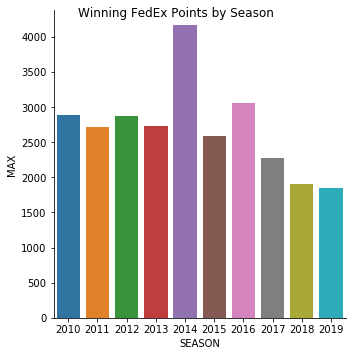

In [79]:
# Plot Max FedEx Cup Points Across Seasons
g1 = sns.catplot(x="SEASON",y ="MAX", data = stats_df_new, kind = "bar")
g1.fig.suptitle('Winning FedEx Points by Season')
g1.savefig('y_hist_max.png', dpi=400)

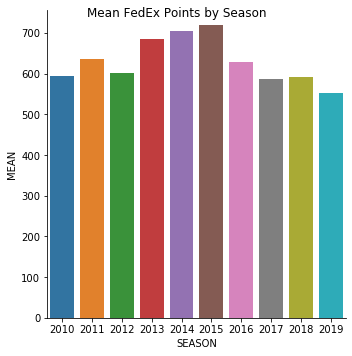

In [80]:
# Plot Mean FedEx Cup Points Across Seasons
g2 = sns.catplot(x="SEASON",y ="MEAN", data = stats_df_new, kind = "bar")
g2.fig.suptitle('Mean FedEx Points by Season')
g2.savefig('y_hist_mean.png', dpi=400)

Since the regression will focus on predicting the following season's % of winning total won based on the previous year's stats, each row will need to have a reference to the following year's results. 

#### Create Next Season Columns

In [83]:
# Create a next season column
clean_data['SEASON_NEXT'] = clean_data['SEASON'].apply(lambda x: x+1)


In [84]:
# Merge the next season column back into the df to provide the appropriate shift of results.
clean_data = clean_data.merge(clean_data[['PLAYER','SEASON','PERCENTAGE_OF_WINNING_PTS']],
                 left_on=['PLAYER','SEASON_NEXT'],
                 right_on = ['PLAYER','SEASON'])
clean_data.head()

,py,APPROACHES_FROM_100_125_YARDS,APPROACHES_FROM_100_125_YARDS_RGH,APPROACHES_FROM_125_150_YARDS,APPROACHES_FROM_125_150_YARDS_RGH,APPROACHES_FROM_150_175_YARDS,APPROACHES_FROM_150_175_YARDS_RGH,APPROACHES_FROM_175_200_YARDS,APPROACHES_FROM_175_200_YARDS_RGH,APPROACHES_FROM_200_225_YARDS,...,PUTTING_INSIDE_10ft,PUTTS_PER_ROUND,ROUGH_PROXIMITY,SAND_SAVE_PERCENTAGE,PLAYER,SEASON_x,PERCENTAGE_OF_WINNING_PTS_x,SEASON_NEXT,SEASON_y,PERCENTAGE_OF_WINNING_PTS_y
0,2010_Aaron Baddeley,244,464,305,399,372,522,432,629,588,...,88.06,28.57,537,54.82,Aaron Baddeley,2010,0.260563,2011,2011,0.619622
1,2010_Adam Scott,192,300,247,468,304,437,349,581,459,...,83.05,30.07,494,53.04,Adam Scott,2010,0.509209,2011,2011,0.698846
2,2010_Alex Cejka,210,338,264,319,328,478,388,713,444,...,85.18,29.70,500,44.17,Alex Cejka,2010,0.264897,2011,2011,0.158972
3,2010_Alex Prugh,239,410,279,394,360,512,411,632,528,...,88.51,29.47,498,52.00,Alex Prugh,2010,0.284940,2011,2011,0.109654
4,2010_Andres Romero,295,385,278,392,331,497,393,515,417,...,87.93,28.93,494,47.46,Andres Romero,2010,0.226436,2011,2011,0.341553


### Rename Merged Columns

In [85]:
clean_data.rename(columns ={'PERCENTAGE_OF_WINNING_PTS_y':'NEXT_PERCENTAGE_OF_WINNING_PTS'},inplace = True)
clean_data.rename(columns ={'SEASON_x':'SEASON_CURRENT'},inplace = True)
clean_data.rename(columns ={'PERCENTAGE_OF_WINNING_PTS_x':'PERCENTAGE_OF_WINNING_PTS'},inplace = True)
clean_data = clean_data.drop(['SEASON_y'], axis = 1)
clean_data.head()

,py,APPROACHES_FROM_100_125_YARDS,APPROACHES_FROM_100_125_YARDS_RGH,APPROACHES_FROM_125_150_YARDS,APPROACHES_FROM_125_150_YARDS_RGH,APPROACHES_FROM_150_175_YARDS,APPROACHES_FROM_150_175_YARDS_RGH,APPROACHES_FROM_175_200_YARDS,APPROACHES_FROM_175_200_YARDS_RGH,APPROACHES_FROM_200_225_YARDS,...,PUTTING_FROM_25ft_plus,PUTTING_INSIDE_10ft,PUTTS_PER_ROUND,ROUGH_PROXIMITY,SAND_SAVE_PERCENTAGE,PLAYER,SEASON_CURRENT,PERCENTAGE_OF_WINNING_PTS,SEASON_NEXT,NEXT_PERCENTAGE_OF_WINNING_PTS
0,2010_Aaron Baddeley,244,464,305,399,372,522,432,629,588,...,5.96,88.06,28.57,537,54.82,Aaron Baddeley,2010,0.260563,2011,0.619622
1,2010_Adam Scott,192,300,247,468,304,437,349,581,459,...,6.28,83.05,30.07,494,53.04,Adam Scott,2010,0.509209,2011,0.698846
2,2010_Alex Cejka,210,338,264,319,328,478,388,713,444,...,4.58,85.18,29.70,500,44.17,Alex Cejka,2010,0.264897,2011,0.158972
3,2010_Alex Prugh,239,410,279,394,360,512,411,632,528,...,4.50,88.51,29.47,498,52.00,Alex Prugh,2010,0.284940,2011,0.109654
4,2010_Andres Romero,295,385,278,392,331,497,393,515,417,...,7.69,87.93,28.93,494,47.46,Andres Romero,2010,0.226436,2011,0.341553


### Re-check Data Types

In [86]:
# Check data types of each column
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 0 to 1227
Data columns (total 47 columns):
py                                       1228 non-null object
APPROACHES_FROM_100_125_YARDS            1228 non-null int64
APPROACHES_FROM_100_125_YARDS_RGH        1228 non-null int64
APPROACHES_FROM_125_150_YARDS            1228 non-null int64
APPROACHES_FROM_125_150_YARDS_RGH        1228 non-null int64
APPROACHES_FROM_150_175_YARDS            1228 non-null int64
APPROACHES_FROM_150_175_YARDS_RGH        1228 non-null int64
APPROACHES_FROM_175_200_YARDS            1228 non-null int64
APPROACHES_FROM_175_200_YARDS_RGH        1228 non-null int64
APPROACHES_FROM_200_225_YARDS            1228 non-null int64
APPROACHES_FROM_200_225_YARDS_RGH        1228 non-null int64
APPROACHES_FROM_225_250_YARDS            1228 non-null int64
APPROACHES_FROM_225_250_YARDS_RGH        1228 non-null int64
APPROACHES_FROM_250_275_YARDS            1228 non-null int64
APPROACHES_FROM_250_275_YARDS_RGH     

In [87]:
# Convert Seasons to integers
clean_data['SEASON_CURRENT']=clean_data['SEASON_CURRENT'].apply(lambda x: int(x))
clean_data['SEASON_NEXT']=clean_data['SEASON_NEXT'].apply(lambda x: int(x))
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 0 to 1227
Data columns (total 47 columns):
py                                       1228 non-null object
APPROACHES_FROM_100_125_YARDS            1228 non-null int64
APPROACHES_FROM_100_125_YARDS_RGH        1228 non-null int64
APPROACHES_FROM_125_150_YARDS            1228 non-null int64
APPROACHES_FROM_125_150_YARDS_RGH        1228 non-null int64
APPROACHES_FROM_150_175_YARDS            1228 non-null int64
APPROACHES_FROM_150_175_YARDS_RGH        1228 non-null int64
APPROACHES_FROM_175_200_YARDS            1228 non-null int64
APPROACHES_FROM_175_200_YARDS_RGH        1228 non-null int64
APPROACHES_FROM_200_225_YARDS            1228 non-null int64
APPROACHES_FROM_200_225_YARDS_RGH        1228 non-null int64
APPROACHES_FROM_225_250_YARDS            1228 non-null int64
APPROACHES_FROM_225_250_YARDS_RGH        1228 non-null int64
APPROACHES_FROM_250_275_YARDS            1228 non-null int64
APPROACHES_FROM_250_275_YARDS_RGH     

# Pickle Final Dataframe

In [88]:
clean_data.to_csv('full_dataset_percentage_win.csv', index = False)